In [152]:
%config InlineBackend.figure_format = 'retina'

In [153]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math

# **Амплитудная модуляция**

### **Условия для амплитудной модуляции:**
Зависимость нагрузочного напряжения (несущий сигнал): \\
$u=U_0coswt$, где $U_0 -$несущая \\

Зависимость полезного напряжения (модулируемый сигнал): \\
$v=mU_0cos \Omega t$

In [202]:
U_0 = math.sqrt(2)
m = 0.5
w = 10 ** 5
omega = 5 * 10 ** 3
T = 2 * np.pi / w

In [203]:
def plot_ampspectre(values, arguments):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    for i in range(len(arguments)):
        plt.plot([arguments[i], arguments[i]], [0, values[i]], c="red", linewidth=3.0)
    ax.set(title=f'Спектр амплитудно модулированного сигнала')
    ax.set_xticks(np.linspace(min(arguments) - omega, max(arguments) + omega, 7))
    ax.set_xlabel('Частота, [Гц]')
    ax.set_ylim(0)
    ax.set_yticks(np.linspace(0, 1.05 * max(values), 18))
    ax.set_ylabel('Напряжение, [В]')
    plt.grid()
    plt.show()

In [204]:
def get_ampmodulated(t):
    return U_0 * (1 + m * np.cos(omega * t)) * np.cos(w * t)

def get_contour_upper(t):
    return U_0 * (1 + m * np.cos(omega * t))

def show_ampmodulated(t_max, bypass):
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    t = np.linspace(0, t_max, 2000)
    if not bypass:
        ax.scatter(x=t, 
                   y=get_ampmodulated(t),
                   label='Напряжение модулированного сигнала, [В]', 
                   c=abs(get_ampmodulated(t)), cmap=cm.winter)
    else:
        ax.scatter(x=t, y=get_contour_upper(t), c='red', s=1)
        ax.scatter(x=t, y=-get_contour_upper(t), c='red', s=1)
        ax.scatter(x=t, y=get_ampmodulated(t),
                   label='Напряжение модулированного сигнала в ограничении, [В]')
    ax.set(title=f'Картина напряжений сигналов при Амплитудной Модуляции')
    ax.set_ylabel('Напряжение, [В]')
    ax.set_xlabel('Время, [c]')
    ax.legend()
    plt.grid()
    plt.show()

Коэффициент модуляции $m<1$ и частота модулируемого сигнала $\Omega$ много меньшая несущей ($\Omega<<w$) \\
$U_{mod}=U_0coswt+mU_0cos \Omega t \cdot coswt=(U_0+mU_0cos \Omega t) coswt$ \\
$U_{mod}=U_0coswt + \frac{mU_0}{2}cos(\Omega+w)t+\frac{mU_0}{2}cos(w-\Omega)t$ \\

Тогда спектр будет представим тремя значениями по частотам и двумя по амплитудам напряжений:

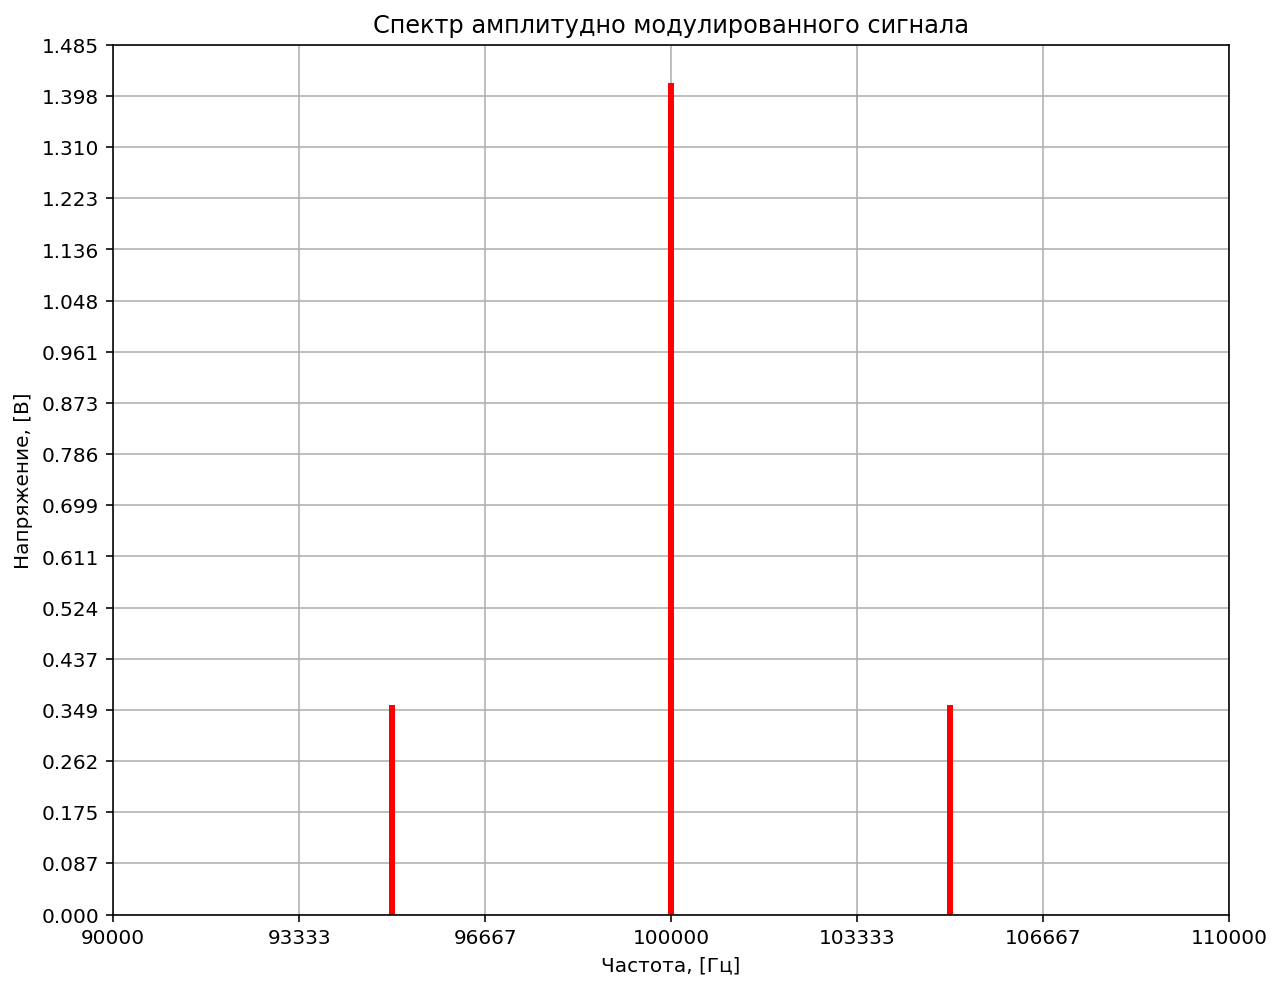

[95000, 100000, 105000]


In [205]:
plot_ampspectre(values=[m * U_0 / 2, U_0, m * U_0 / 2], arguments=[w - omega, w, w + omega])
print([w - omega, w, w + omega])

Заметим, что основной период суммы стал $T_{mod}=\frac{2\pi}{\Omega}$

Построим модулированный сигнал:

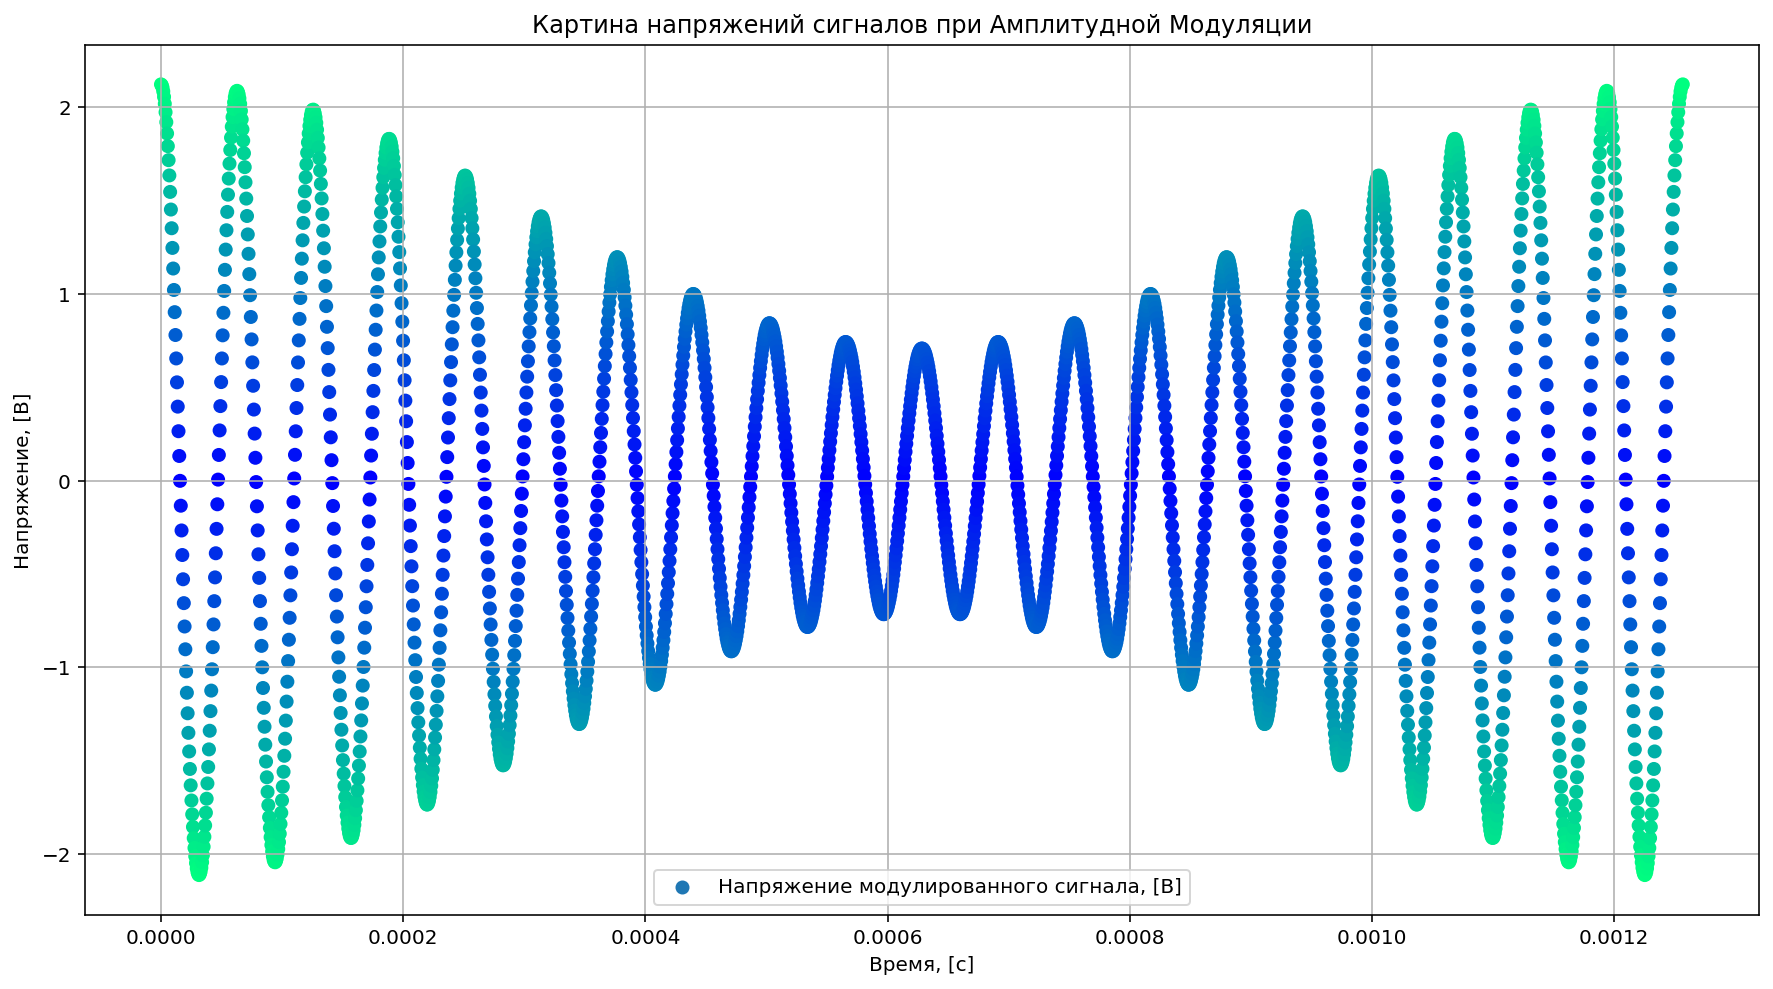

In [206]:
show_ampmodulated(t_max=2 * np.pi / omega, bypass=False)

И удостоверимся, что вложенная гармоника ограничена $U_{amp}=\pm(1+m)U_0cos \Omega t$ на графике:

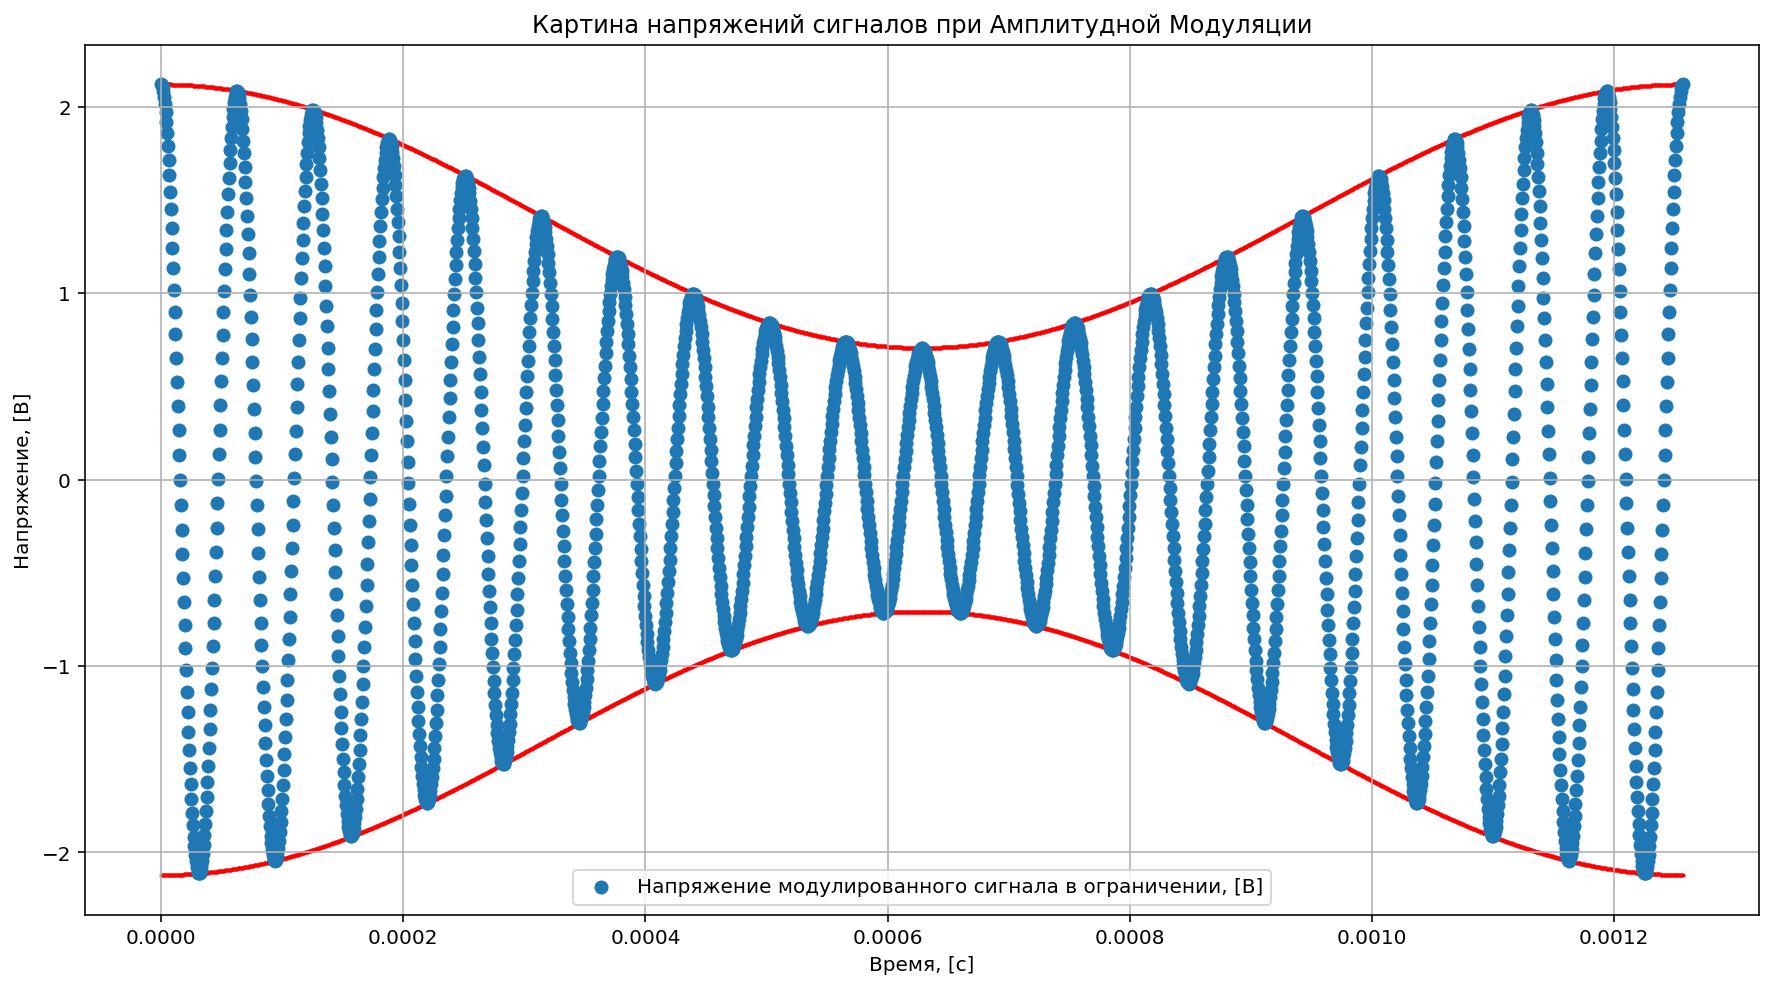

In [207]:
show_ampmodulated(t_max=2 * np.pi / omega, bypass=True)

# **Частотная модуляция**

### **Условия для частотной модуляции:**
Зависимость нагрузочного напряжения (несущий сигнал): \\
$u=U_0coswt$, где $U_0 -$несущая \\

Зависимость полезного напряжения (модулируемый сигнал): \\
$v=mU_0cos \Omega t$

In [276]:
U_0_freq = 0.025
deviation = 4 * 10 ** 4
w = 10 ** 5
freq_omega = 2 * 10 ** 3
T = 2 * np.pi / w

Тогда для модулированного сигнала справедливо:

$U_{mod}=U_0cos(wt+\Delta f_m \int cos(\Omega t) dt)$ \\
$U_{mod}=U_0cos(wt+\frac{\Delta f_m}{\Omega} sin(\Omega t))$ \\

In [282]:
def get_freqmodulated(t, dev):
    return U_0_freq * np.cos(2 * np.pi * w * t + dev / freq_omega * np.sin(2 * np.pi * freq_omega * t))

def show_freqmodulated(t_max, dev):
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    t = np.linspace(0, t_max, 20000)
    ax.scatter(x=t, 
               y=get_freqmodulated(t, dev),
               s=5,
               c=abs(get_freqmodulated(t, dev)), cmap=cm.winter)
    ax.set(title=f'Картина напряжений сигналов при частотной модуляции c девиацией {dev}')
    ax.set_ylabel('Напряжение, [В]')
    ax.set_xlabel('Время, [c]')
    plt.grid()
    plt.show()

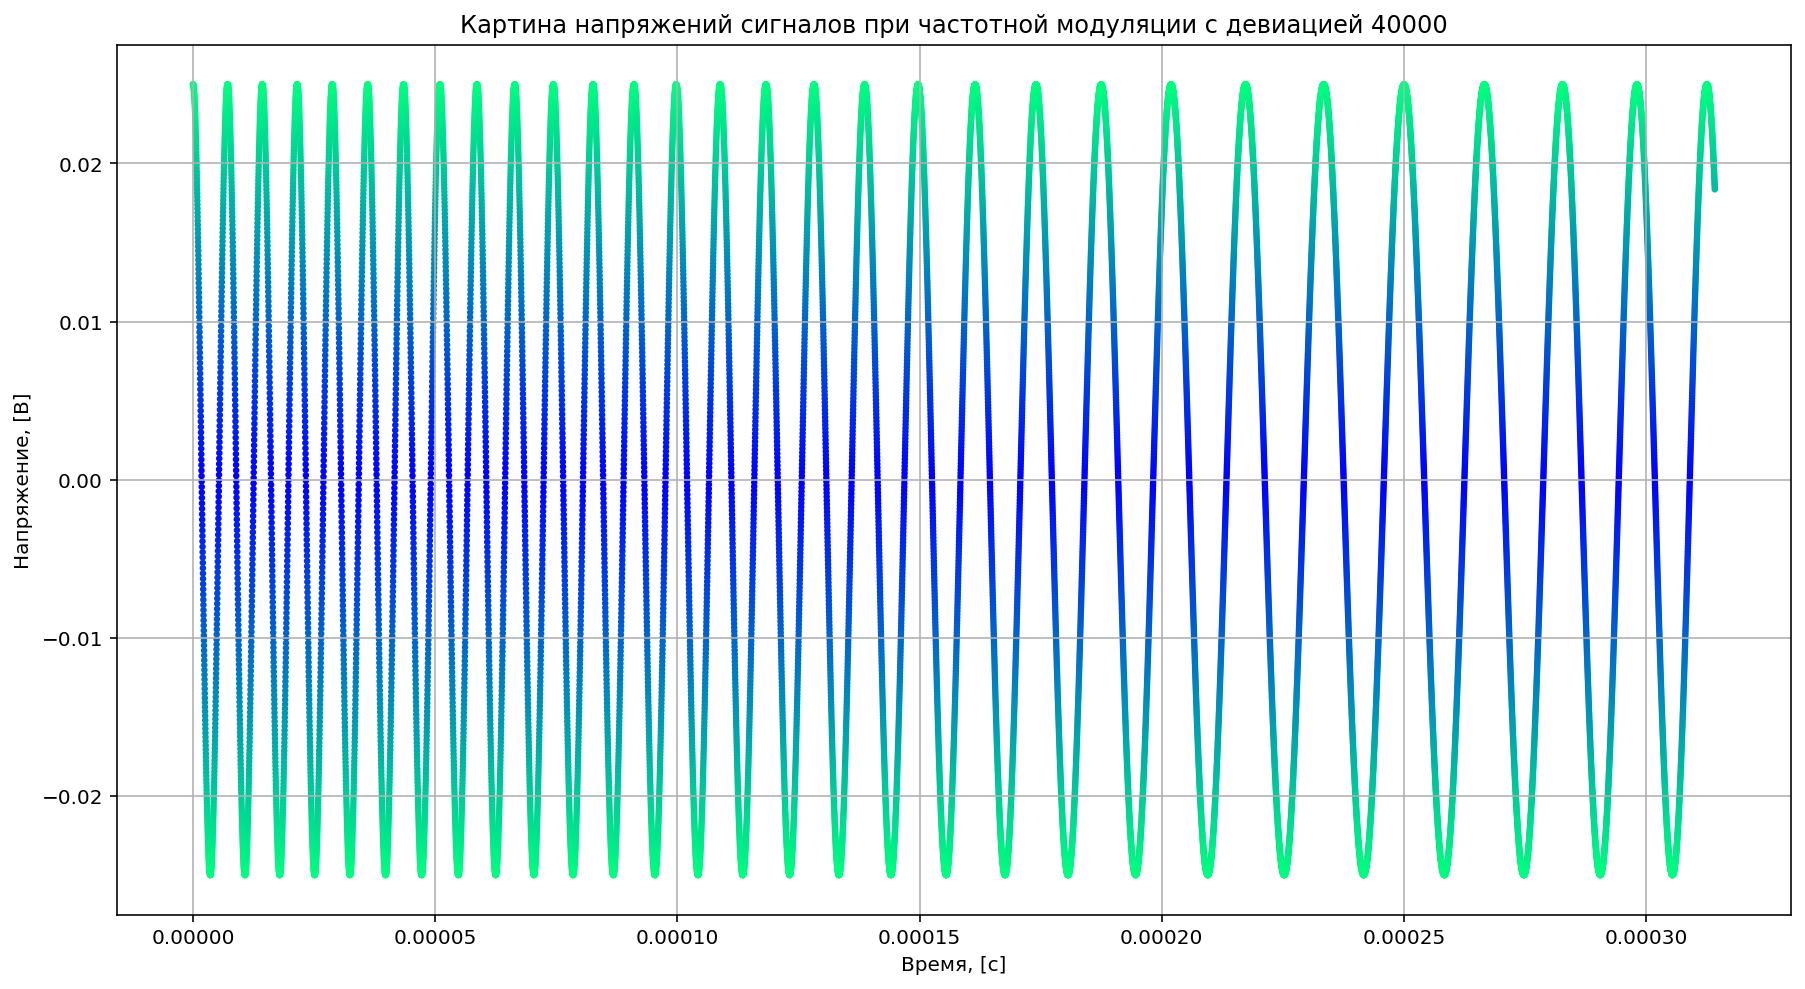

In [283]:
show_freqmodulated(t_max=5*T, dev=deviation)

Заметим, что при увеличении параметра девиации $\Delta f_m$ возрастает спектр частот, то есть формы сигнала в состоянии ***0*** или ***1*** различаются по частоте все больше и больше 

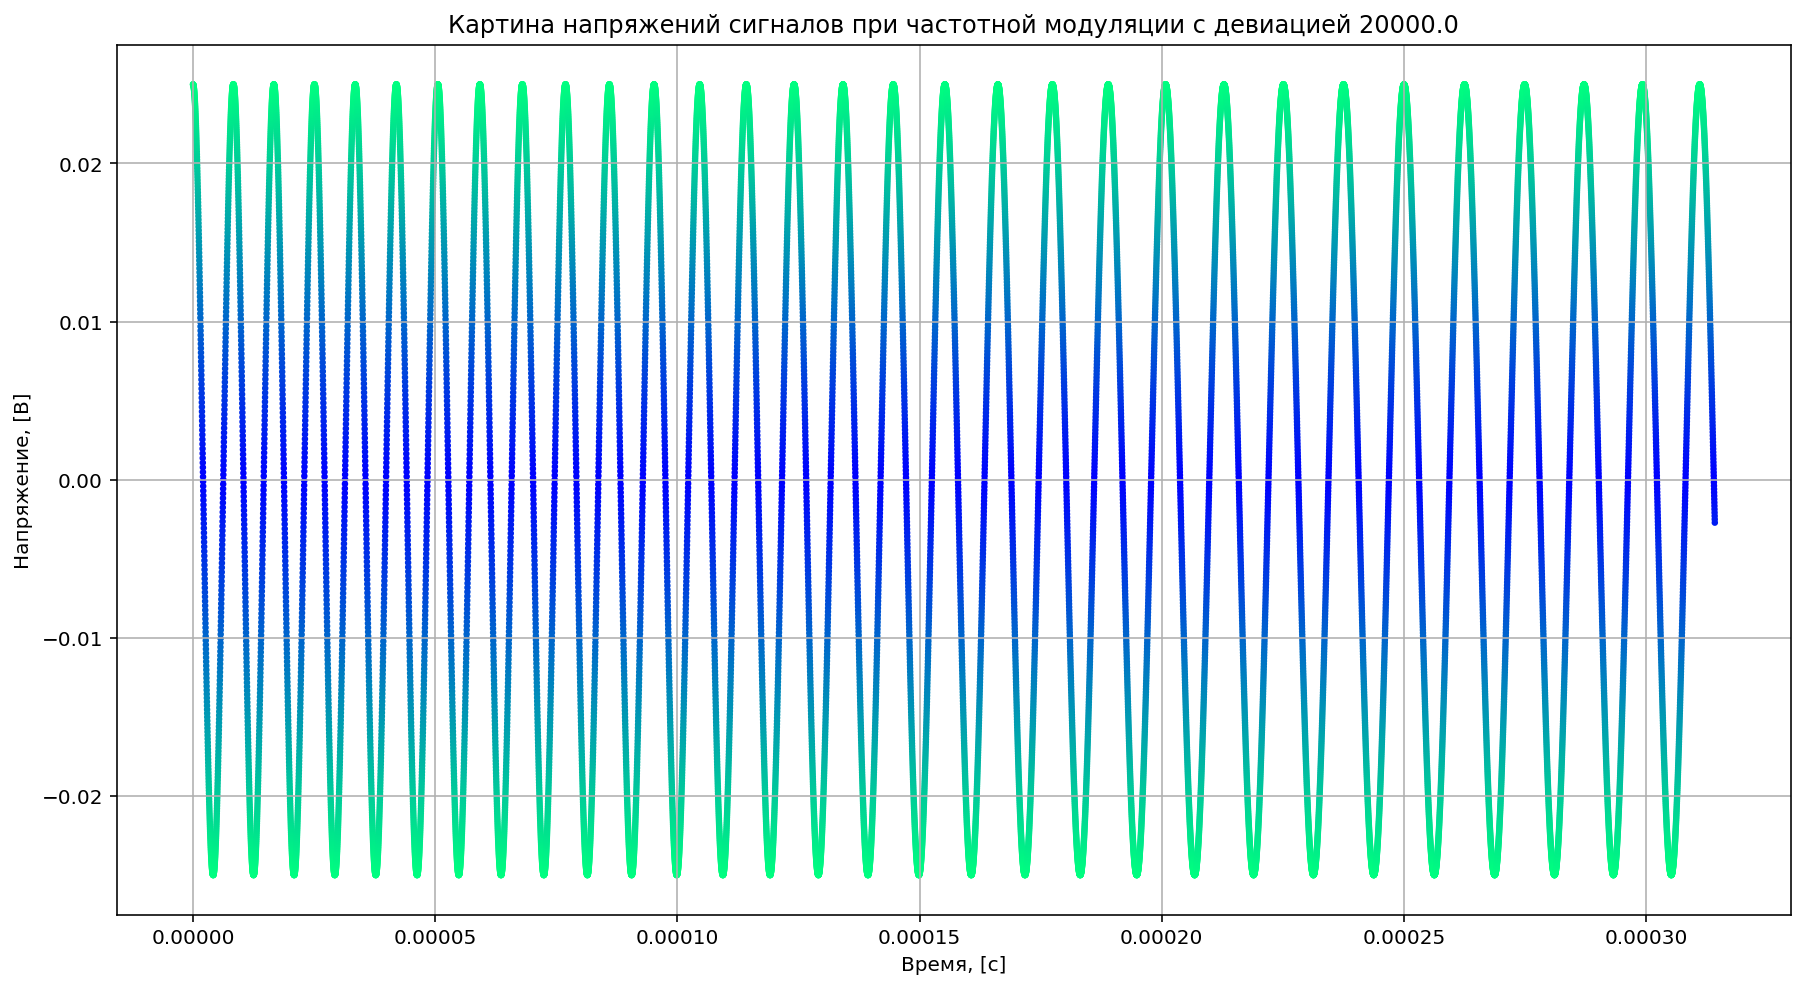

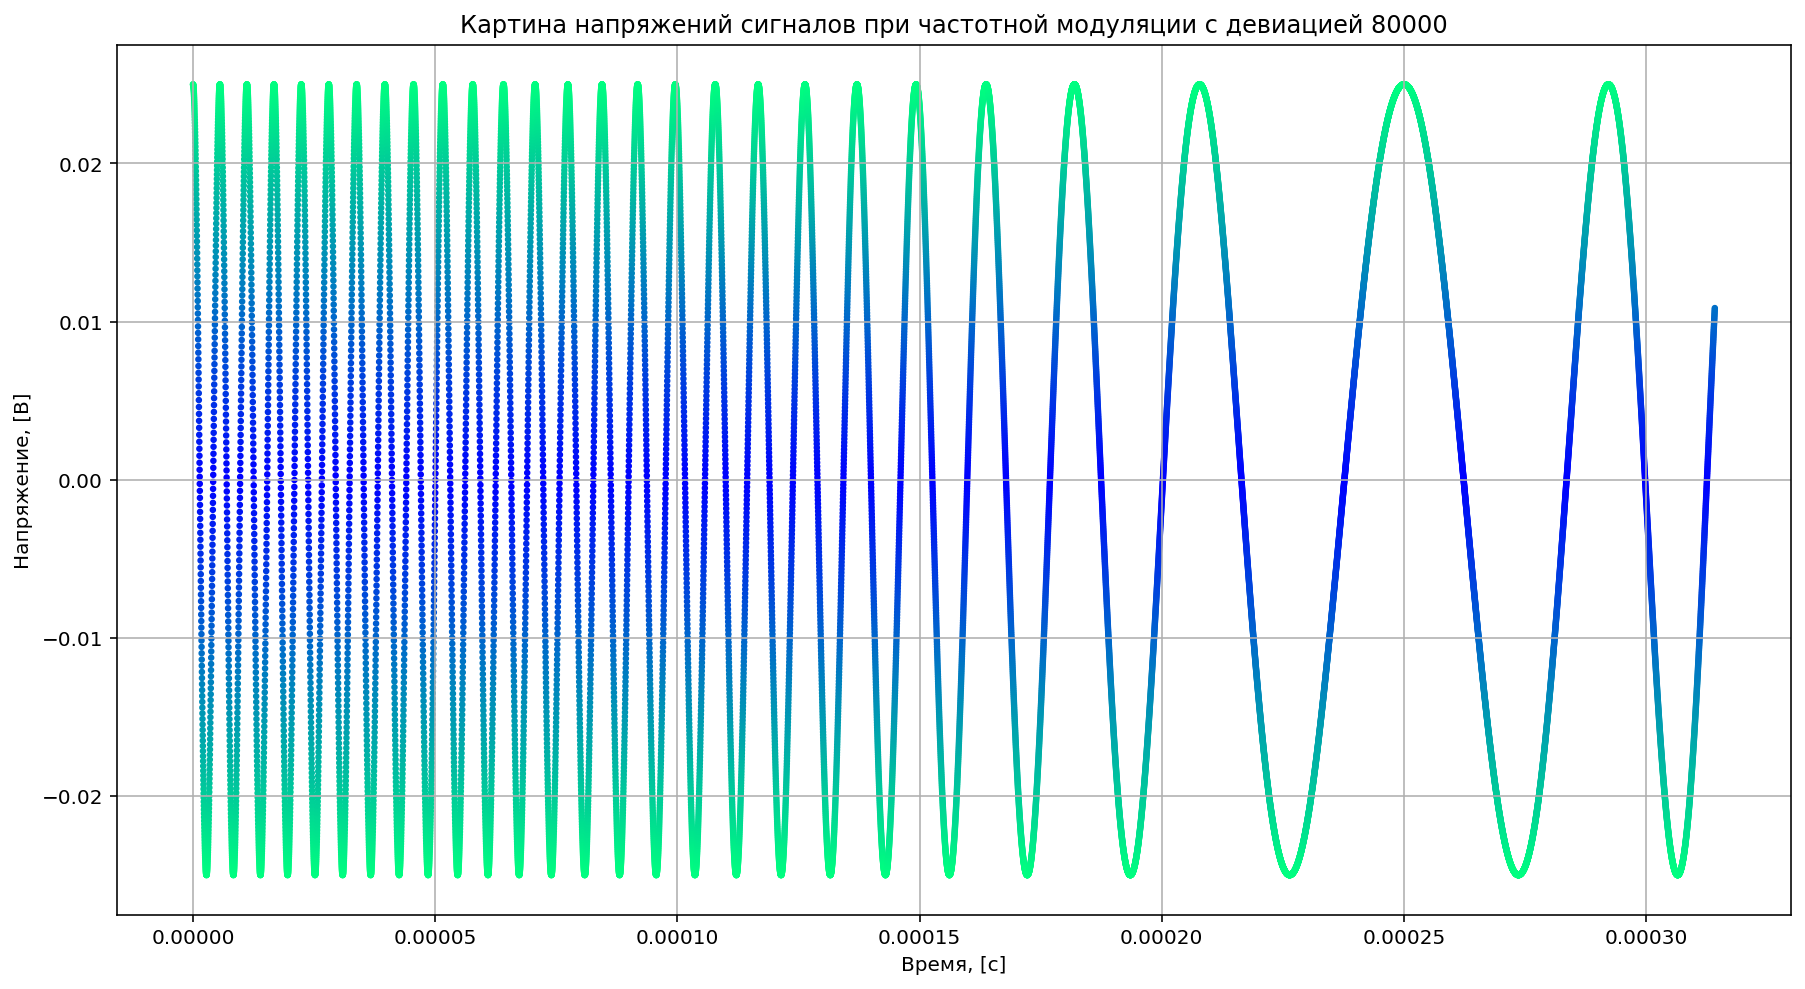

In [285]:
show_freqmodulated(t_max=5*T, dev=deviation/2)
show_freqmodulated(t_max=5*T, dev=deviation*2)

# **Фазовая модуляция**